In [3]:
from google.colab import files
upload = files.upload()
!mkdir ~/.kaggle

Saving kaggle.json to kaggle.json


In [0]:
!mv ./kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d johnolafenwa/us-census-data

  0% 0.00/719k [00:00<?, ?B/s]
100% 719k/719k [00:00<00:00, 47.9MB/s]


In [6]:
!ls

sample_data  us-census-data.zip


In [7]:
!unzip us-census-data.zip

Archive:  us-census-data.zip
  inflating: adult-test.csv          
  inflating: adult-training.csv      


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [232]:
columns = ['Age','Workclass','fnlgwt','Education','Education num','Marital Status',
           'Occupation','Relationship','Race','Sex','Capital Gain','Capital Loss',
           'Hours/Week','Native country','Income']

train_df = pd.read_csv('adult-training.csv', names=columns)
test_df = pd.read_csv('adult-test.csv', names=columns)
train_df.head()

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [233]:
train_df.Income

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
5         <=50K
6         <=50K
7          >50K
8          >50K
9          >50K
10         >50K
11         >50K
12        <=50K
13        <=50K
14         >50K
15        <=50K
16        <=50K
17        <=50K
18        <=50K
19         >50K
20         >50K
21        <=50K
22        <=50K
23        <=50K
24        <=50K
25         >50K
26        <=50K
27         >50K
28        <=50K
29        <=50K
          ...  
32531     <=50K
32532      >50K
32533      >50K
32534     <=50K
32535     <=50K
32536      >50K
32537     <=50K
32538      >50K
32539      >50K
32540     <=50K
32541     <=50K
32542     <=50K
32543     <=50K
32544     <=50K
32545      >50K
32546     <=50K
32547     <=50K
32548     <=50K
32549     <=50K
32550     <=50K
32551     <=50K
32552     <=50K
32553     <=50K
32554      >50K
32555     <=50K
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: Income, Length: 32

In [234]:
print(train_df.Income.dtype)
train_df.describe()

object


,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [235]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlgwt            32561 non-null int64
Education         32561 non-null object
Education num     32561 non-null int64
Marital Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours/Week        32561 non-null int64
Native country    32561 non-null object
Income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [0]:
def preprocess(df):
  df.replace(' ?', np.nan, inplace=True)
  print("Replaced ? with NAN values .")
  print("-----------------------------")
  print("There are {} numerical and {} categorical columns.".format(df.select_dtypes(include=[np.number]).shape[1], df.select_dtypes(include=['object']).shape[1]))
  print("------------------------------")
  print("Handling missing values")
  total = df.isnull().sum().sort_values(ascending=False)
  percent = (( df.isnull().sum() / df.isnull().count() ) * 100).sort_values(ascending=False)
  missing_data = pd.DataFrame({
      'total': total,
      'percent': percent
  })
  print(missing_data.head(20))
  cols_to_be_dropped = []
  for percent in missing_data.percent:
    if percent > 15.0:
      cols_to_be_dropped.append(missing_data.index[missing_data.percent == percent][0])
  
  print("There were {} cols with a lot of information missing . So they are being removed".format(len(cols_to_be_dropped)))
  df.drop(cols_to_be_dropped, axis=1, inplace=True)
  print('{} cols were deleted from the dataset'.format(cols_to_be_dropped))
  
  print("-------------------------------")
  
  for total in missing_data['total']:
    if total > 0:
      print("{} feature has {} number of missing values".format(missing_data.index[missing_data.total == total][0], total))
      df[missing_data.index[missing_data.total == total][0]].fillna('0', inplace=True)
      print("Replaced {} values with 0".format(total))
  
  return df
        
        

In [237]:
train_df = preprocess(train_df)

Replaced ? with NAN values .
-----------------------------
There are 6 numerical and 9 categorical columns.
------------------------------
Handling missing values
                total   percent
Occupation       1843  5.660146
Workclass        1836  5.638647
Native country    583  1.790486
Income              0  0.000000
Hours/Week          0  0.000000
Capital Loss        0  0.000000
Capital Gain        0  0.000000
Sex                 0  0.000000
Race                0  0.000000
Relationship        0  0.000000
Marital Status      0  0.000000
Education num       0  0.000000
Education           0  0.000000
fnlgwt              0  0.000000
Age                 0  0.000000
There were 0 cols with a lot of information missing . So they are being removed
[] cols were deleted from the dataset
-------------------------------
Occupation feature has 1843 number of missing values
Replaced 1843 values with 0
Workclass feature has 1836 number of missing values
Replaced 1836 values with 0
Native country

In [238]:
test_df = preprocess(test_df)

Replaced ? with NAN values .
-----------------------------
There are 5 numerical and 10 categorical columns.
------------------------------
Handling missing values
                total   percent
Occupation        967  5.939074
Workclass         964  5.920649
Native country    275  1.688982
Income              1  0.006142
Hours/Week          1  0.006142
Capital Loss        1  0.006142
Capital Gain        1  0.006142
Sex                 1  0.006142
Race                1  0.006142
Relationship        1  0.006142
Marital Status      1  0.006142
Education num       1  0.006142
Education           1  0.006142
fnlgwt              1  0.006142
Age                 0  0.000000
There were 0 cols with a lot of information missing . So they are being removed
[] cols were deleted from the dataset
-------------------------------
Occupation feature has 967 number of missing values
Replaced 967 values with 0
Workclass feature has 964 number of missing values
Replaced 964 values with 0
Native country fe

In [239]:
train_df['Workclass']

0                State-gov
1         Self-emp-not-inc
2                  Private
3                  Private
4                  Private
5                  Private
6                  Private
7         Self-emp-not-inc
8                  Private
9                  Private
10                 Private
11               State-gov
12                 Private
13                 Private
14                 Private
15                 Private
16        Self-emp-not-inc
17                 Private
18                 Private
19        Self-emp-not-inc
20                 Private
21                 Private
22             Federal-gov
23                 Private
24                 Private
25               Local-gov
26                 Private
27                       0
28                 Private
29                 Private
               ...        
32531                    0
32532              Private
32533              Private
32534              Private
32535              Private
32536              Private
3

In [240]:
test_df.columns

Index(['Age', 'Workclass', 'fnlgwt', 'Education', 'Education num',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours/Week', 'Native country',
       'Income'],
      dtype='object')

In [241]:
train_df.Income

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
5         <=50K
6         <=50K
7          >50K
8          >50K
9          >50K
10         >50K
11         >50K
12        <=50K
13        <=50K
14         >50K
15        <=50K
16        <=50K
17        <=50K
18        <=50K
19         >50K
20         >50K
21        <=50K
22        <=50K
23        <=50K
24        <=50K
25         >50K
26        <=50K
27         >50K
28        <=50K
29        <=50K
          ...  
32531     <=50K
32532      >50K
32533      >50K
32534     <=50K
32535     <=50K
32536      >50K
32537     <=50K
32538      >50K
32539      >50K
32540     <=50K
32541     <=50K
32542     <=50K
32543     <=50K
32544     <=50K
32545      >50K
32546     <=50K
32547     <=50K
32548     <=50K
32549     <=50K
32550     <=50K
32551     <=50K
32552     <=50K
32553     <=50K
32554      >50K
32555     <=50K
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: Income, Length: 32

In [242]:
test_df.Income

0              0
1         <=50K.
2         <=50K.
3          >50K.
4          >50K.
5         <=50K.
6         <=50K.
7         <=50K.
8          >50K.
9         <=50K.
10        <=50K.
11         >50K.
12        <=50K.
13        <=50K.
14        <=50K.
15         >50K.
16         >50K.
17        <=50K.
18        <=50K.
19        <=50K.
20         >50K.
21         >50K.
22        <=50K.
23        <=50K.
24        <=50K.
25        <=50K.
26         >50K.
27        <=50K.
28        <=50K.
29        <=50K.
          ...   
16252     <=50K.
16253      >50K.
16254     <=50K.
16255      >50K.
16256      >50K.
16257     <=50K.
16258     <=50K.
16259     <=50K.
16260     <=50K.
16261     <=50K.
16262      >50K.
16263     <=50K.
16264     <=50K.
16265     <=50K.
16266      >50K.
16267     <=50K.
16268     <=50K.
16269     <=50K.
16270     <=50K.
16271     <=50K.
16272     <=50K.
16273     <=50K.
16274     <=50K.
16275     <=50K.
16276     <=50K.
16277     <=50K.
16278     <=50K.
16279     <=50

In [0]:
train_df['Income'] = train_df['Income'].apply(lambda x: 0 if x==' <=50K' else 1)
test_df['Income'] = test_df['Income'].apply(lambda x: 0 if x==' <=50K.' else 1)

In [244]:
train_df.Income

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8        1
9        1
10       1
11       1
12       0
13       0
14       1
15       0
16       0
17       0
18       0
19       1
20       1
21       0
22       0
23       0
24       0
25       1
26       0
27       1
28       0
29       0
        ..
32531    0
32532    1
32533    1
32534    0
32535    0
32536    1
32537    0
32538    1
32539    1
32540    0
32541    0
32542    0
32543    0
32544    0
32545    1
32546    0
32547    0
32548    0
32549    0
32550    0
32551    0
32552    0
32553    0
32554    1
32555    0
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Income, Length: 32561, dtype: int64

In [245]:
test_df.Income

0        1
1        0
2        0
3        1
4        1
5        0
6        0
7        0
8        1
9        0
10       0
11       1
12       0
13       0
14       0
15       1
16       1
17       0
18       0
19       0
20       1
21       1
22       0
23       0
24       0
25       0
26       1
27       0
28       0
29       0
        ..
16252    0
16253    1
16254    0
16255    1
16256    1
16257    0
16258    0
16259    0
16260    0
16261    0
16262    1
16263    0
16264    0
16265    0
16266    1
16267    0
16268    0
16269    0
16270    0
16271    0
16272    0
16273    0
16274    0
16275    0
16276    0
16277    0
16278    0
16279    0
16280    0
16281    1
Name: Income, Length: 16282, dtype: int64

In [246]:
count_1 = 0
count_0 = 0
for feat in test_df.Income:
  if feat == 0:
    count_0 += 1
  else:
    count_1 += 1
    
print(count_1)
print(count_0)
print(count_1 + count_0)

3847
12435
16282


In [247]:
count_1 = 0
count_0 = 0
for feat in train_df.Income:
  if feat == 0:
    count_0 += 1
  else:
    count_1 += 1
    
print(count_1)
print(count_0)
print(count_1 + count_0)

7841
24720
32561


In [248]:
test_df.head()

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
0,|1x3 Cross validator,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,0,1
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1


In [249]:
test_df.dropna(axis=0, inplace=True)
test_df.head()
print(test_df.shape, train_df.shape)

(16281, 15) (32561, 15)


In [250]:
test_df.head()

,Age,Workclass,fnlgwt,Education,Education num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Native country,Income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,0
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,0
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,1
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,1
5,18,0,103497.0,Some-college,10.0,Never-married,0,Own-child,White,Female,0.0,0.0,30.0,United-States,0


In [0]:
def make_plots(df):
  numerical_features = list(df.select_dtypes(include=[np.number]).columns)
  for feats in numerical_features:
    plt.subplots(figsize=(12,9))
    sns.distplot(df[feats], hist=True, fit=norm)
    plt.show()
    print(df[feats].describe())
    
  return df

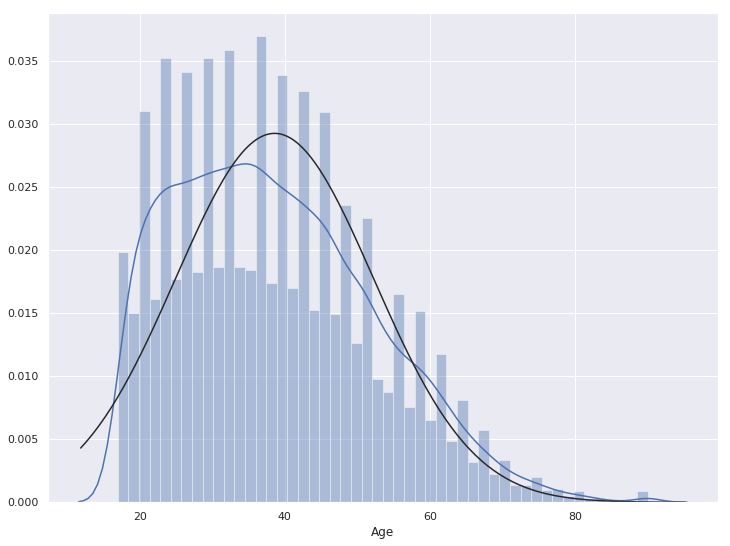

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64


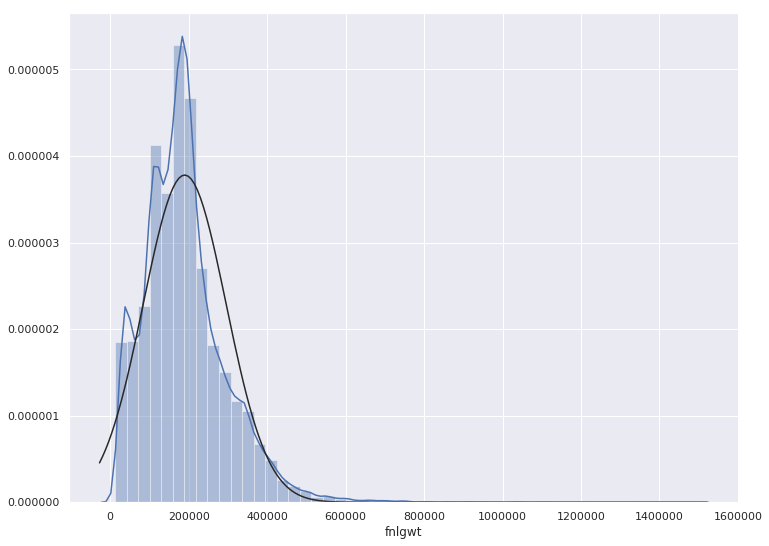

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlgwt, dtype: float64


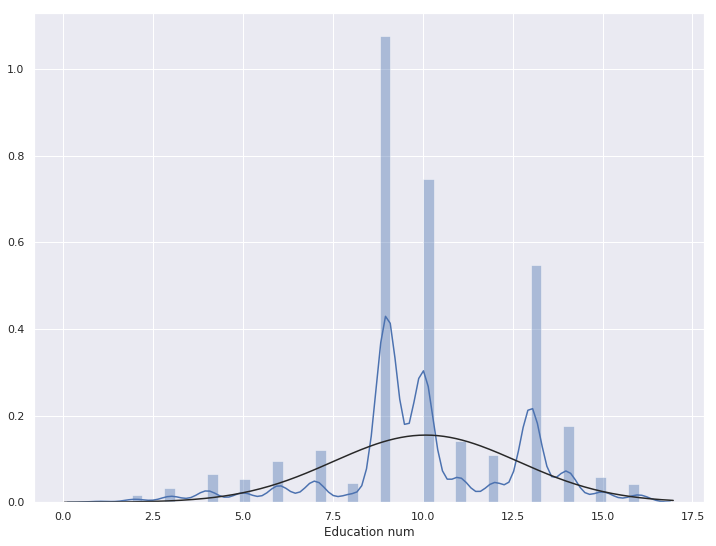

count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: Education num, dtype: float64


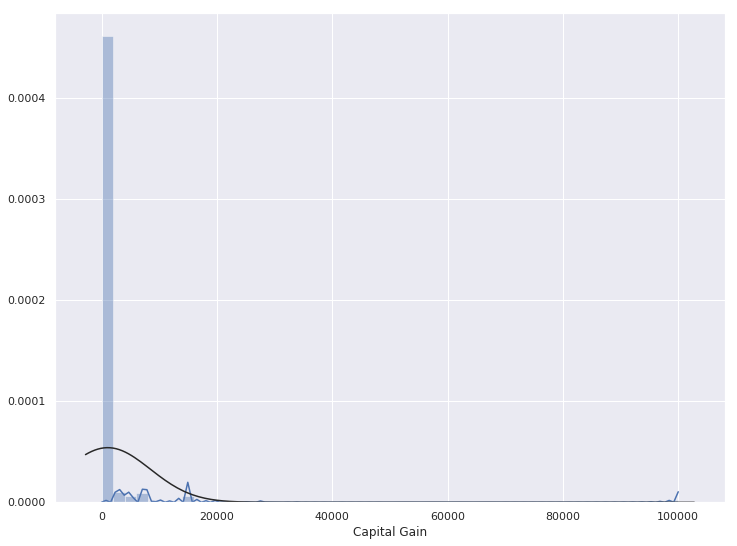

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital Gain, dtype: float64


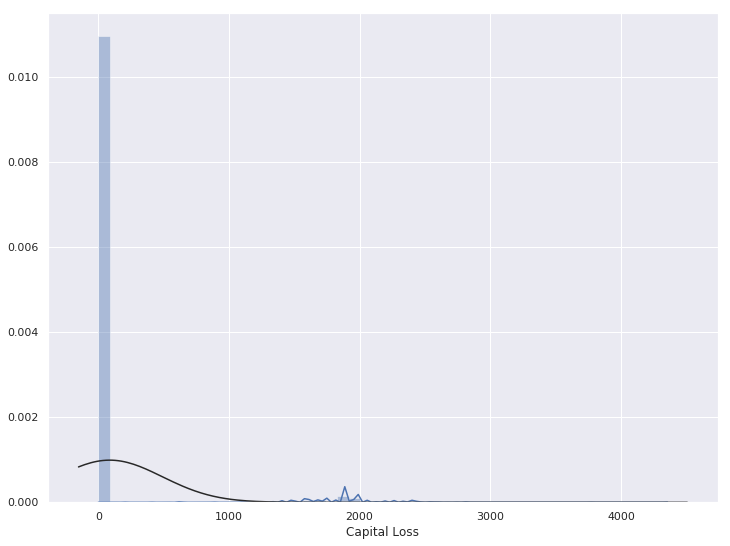

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: Capital Loss, dtype: float64


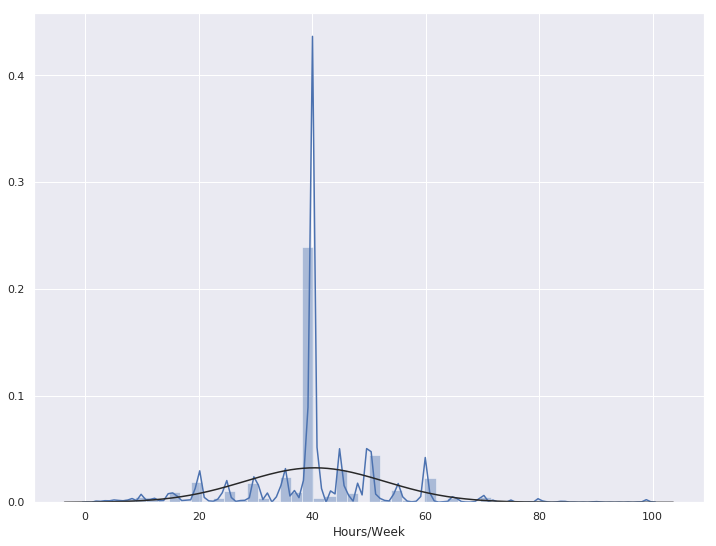

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hours/Week, dtype: float64


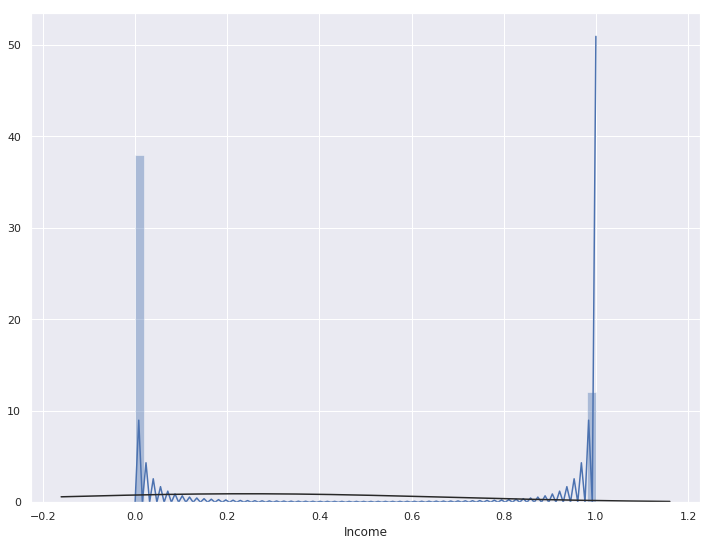

count    32561.000000
mean         0.240810
std          0.427581
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Income, dtype: float64


In [252]:
train_df = make_plots(train_df)

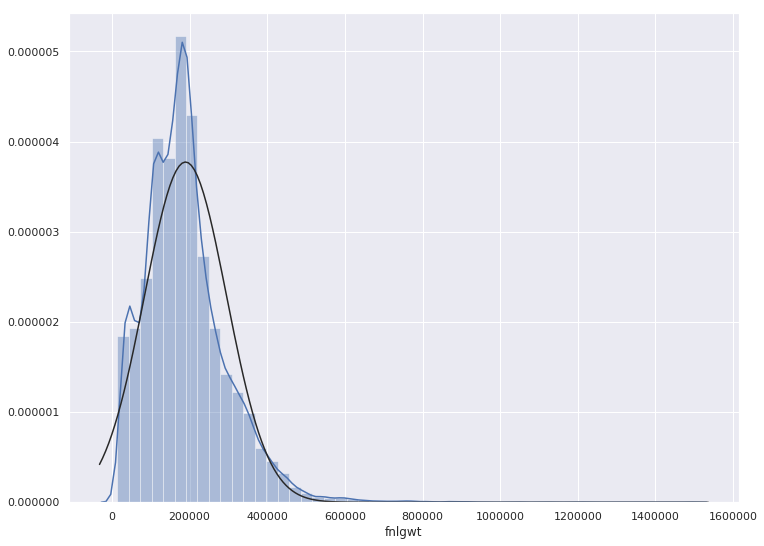

count    1.628100e+04
mean     1.894357e+05
std      1.057149e+05
min      1.349200e+04
25%      1.167360e+05
50%      1.778310e+05
75%      2.383840e+05
max      1.490400e+06
Name: fnlgwt, dtype: float64


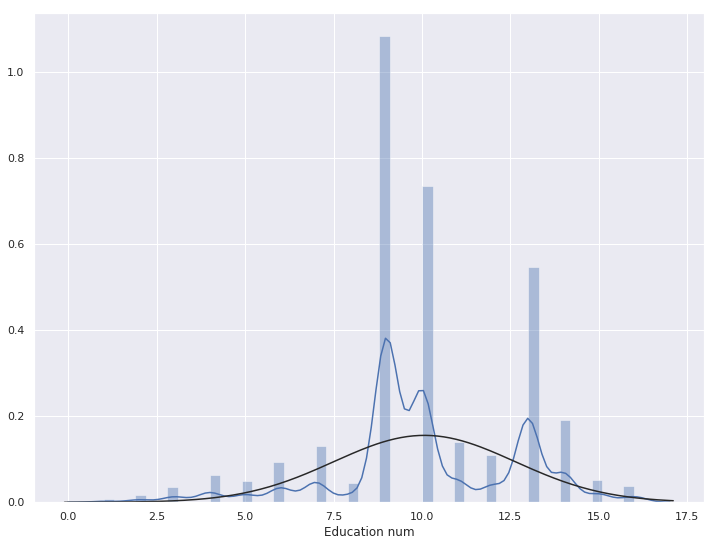

count    16281.000000
mean        10.072907
std          2.567545
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: Education num, dtype: float64


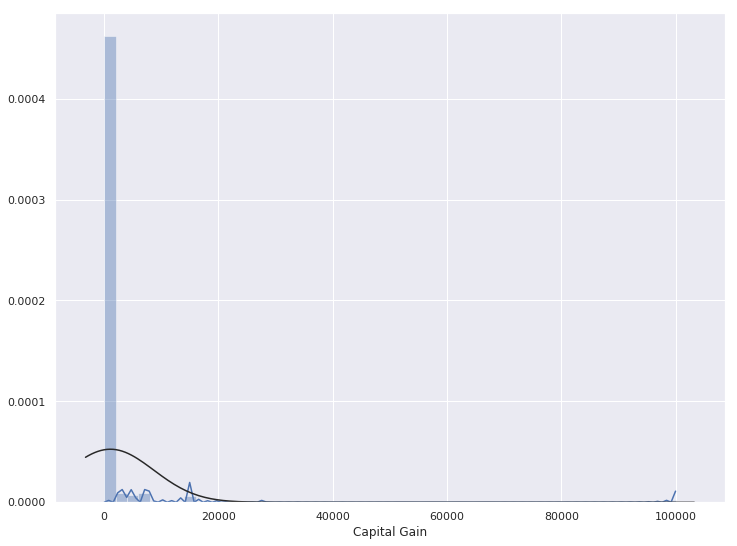

count    16281.000000
mean      1081.905104
std       7583.935968
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital Gain, dtype: float64


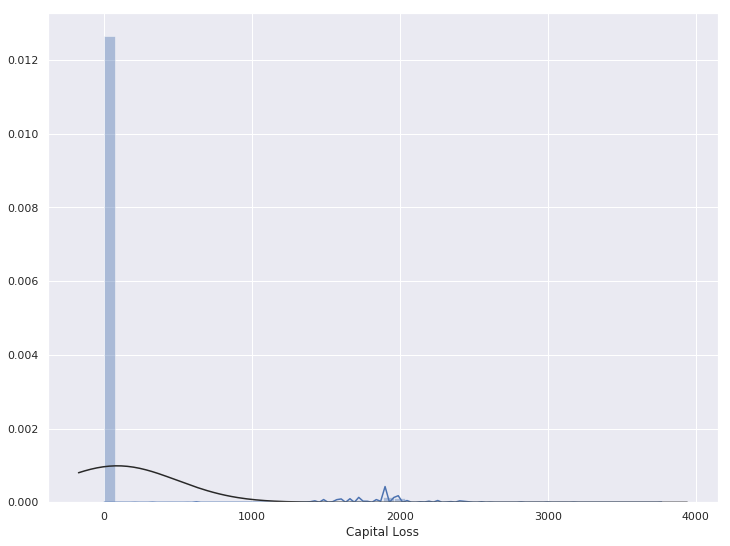

count    16281.000000
mean        87.899269
std        403.105286
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       3770.000000
Name: Capital Loss, dtype: float64


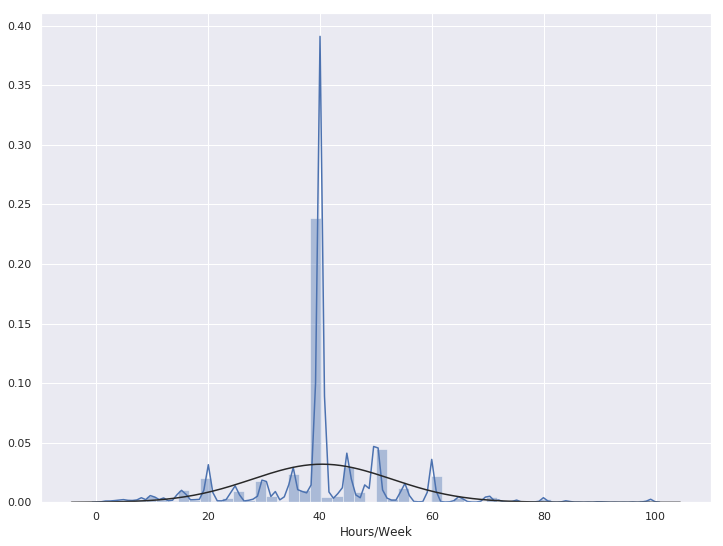

count    16281.000000
mean        40.392236
std         12.479332
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hours/Week, dtype: float64


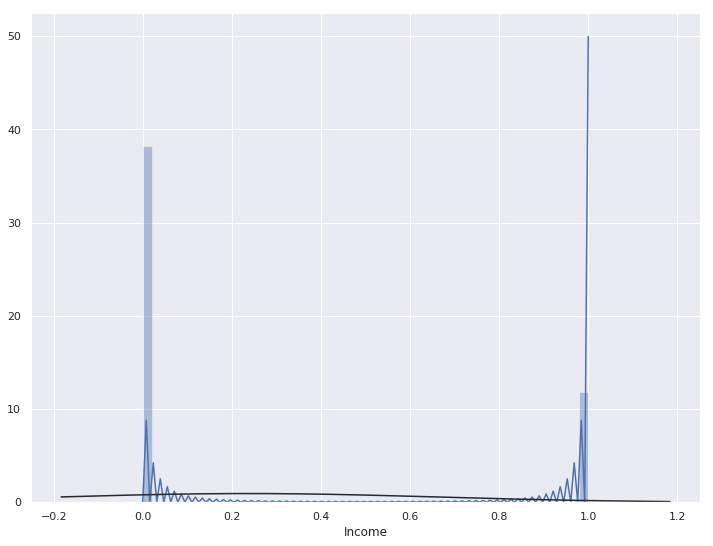

count    16281.000000
mean         0.236226
std          0.424776
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Income, dtype: float64


In [253]:
test_df = make_plots(test_df)

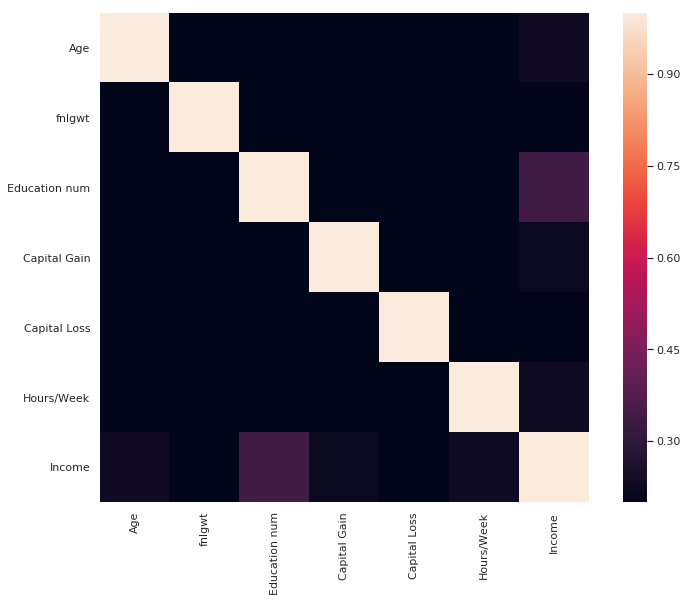

In [254]:
corr_matrix = train_df.corr(method='pearson')
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmin=0.2, square=True)

In [255]:
largest_corrs = corr_matrix.nlargest(10, 'Income')['Income']
largest_corrs

Income           1.000000
Education num    0.335154
Age              0.234037
Hours/Week       0.229689
Capital Gain     0.223329
Capital Loss     0.150526
fnlgwt          -0.009463
Name: Income, dtype: float64

In [0]:
## So the top 5 co-related features are Education_num, age, Hours/week, capital_gain, capital_loss

In [257]:
most_corr_feats = largest_corrs[1:6].index
most_corr_feats

Index(['Education num', 'Age', 'Hours/Week', 'Capital Gain', 'Capital Loss'], dtype='object')

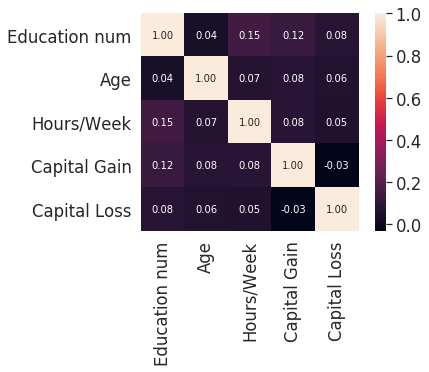

In [258]:
cm = np.corrcoef(train_df[most_corr_feats].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, 
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=most_corr_feats.values, xticklabels=most_corr_feats.values)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


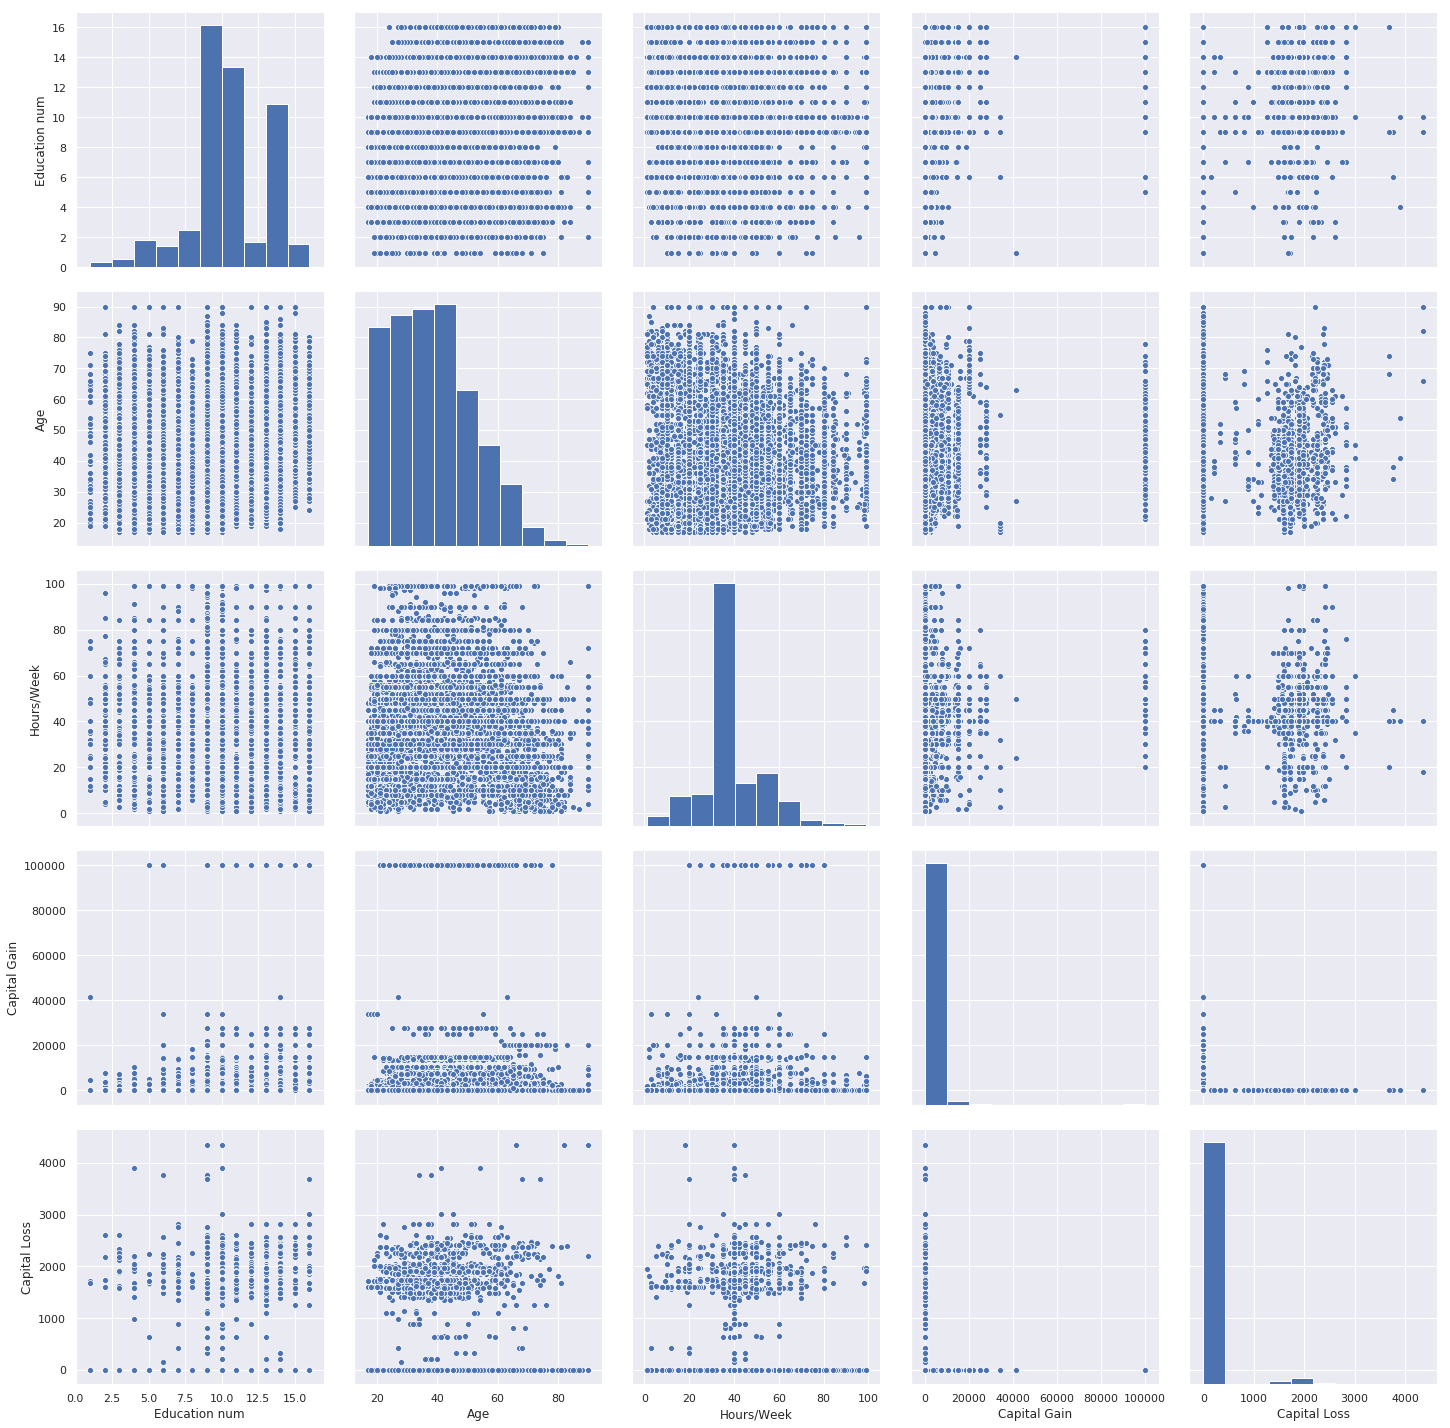

In [259]:
sns.set()
sns.pairplot(train_df[most_corr_feats], size=4)
plt.show()

In [0]:
def make_plots_yet_again(df):
  for feat in most_corr_feats:
    plt.subplots(figsize=(12,9))
    sns.barplot(x=df[feat], y='Income', data=df)
    plt.xticks(rotation=90)
    plt.show()

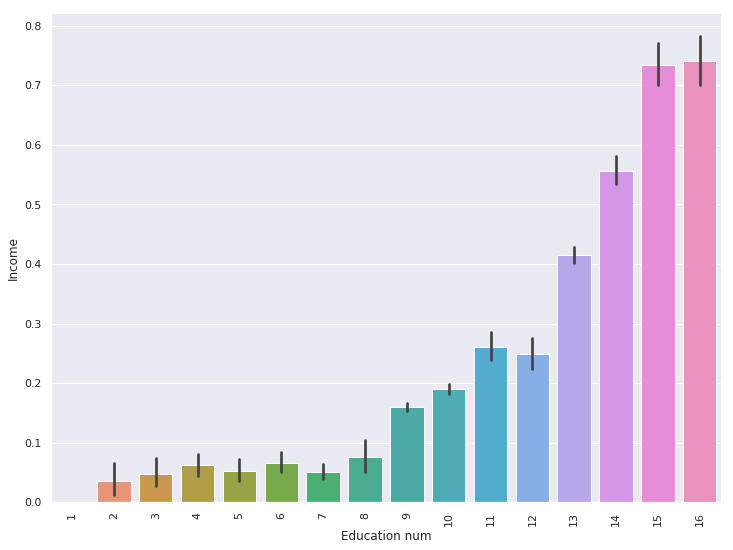

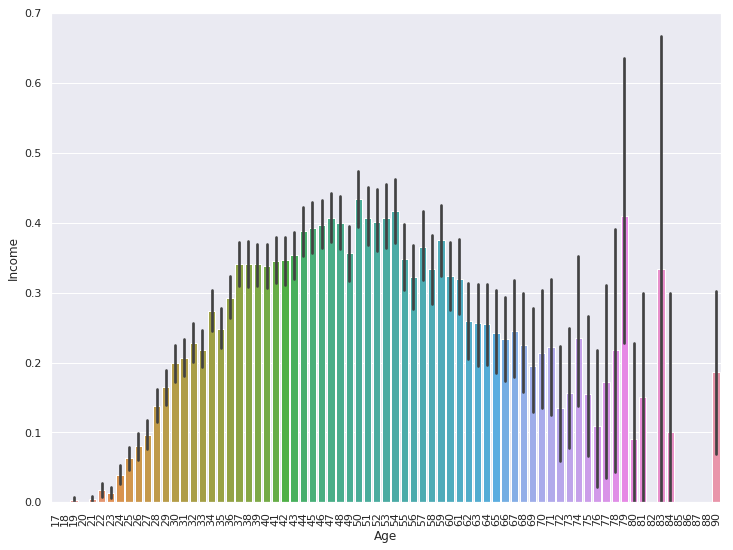

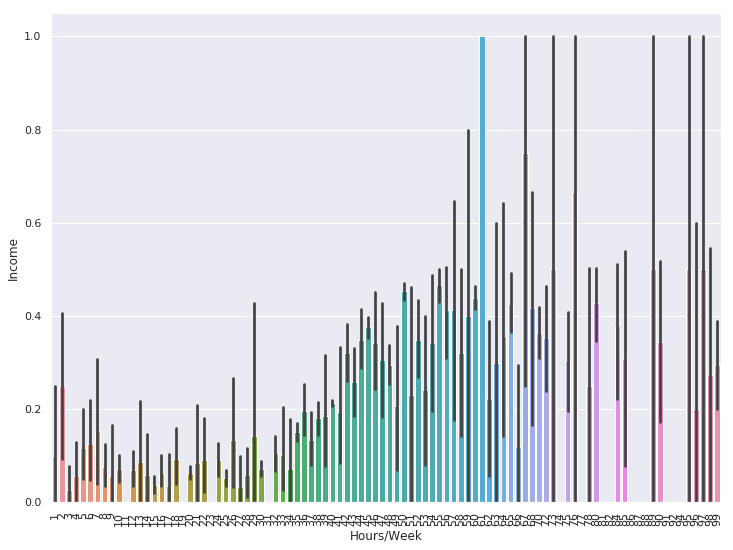

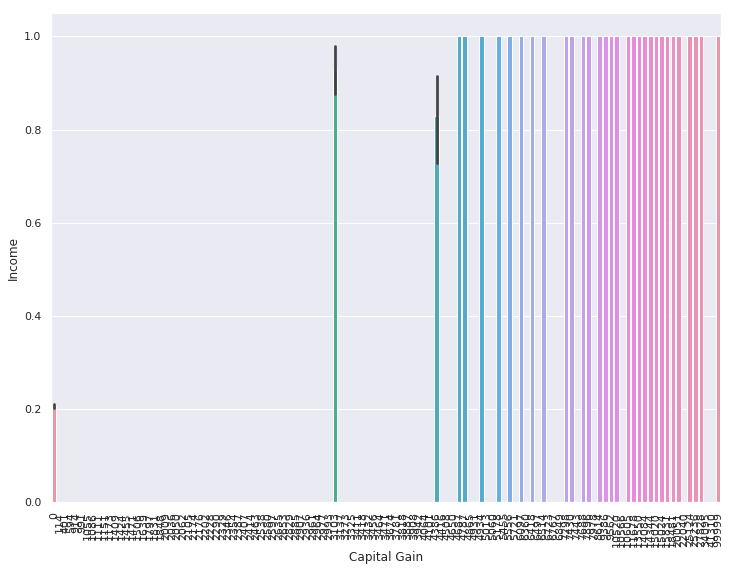

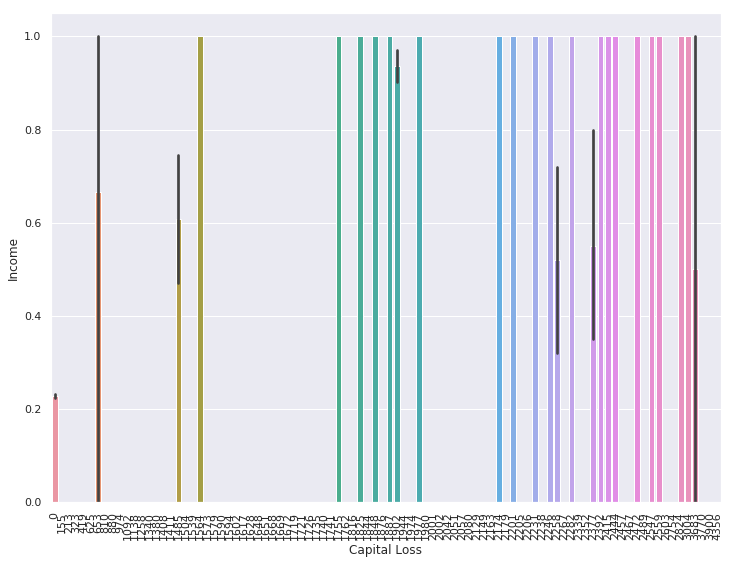

In [261]:
make_plots_yet_again(train_df)

In [262]:
train_df.isnull().sum()

Age               0
Workclass         0
fnlgwt            0
Education         0
Education num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours/Week        0
Native country    0
Income            0
dtype: int64

In [263]:
test_df.isnull().sum()

Age               0
Workclass         0
fnlgwt            0
Education         0
Education num     0
Marital Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital Gain      0
Capital Loss      0
Hours/Week        0
Native country    0
Income            0
dtype: int64

In [0]:
train_df.drop(['Education'], axis=1, inplace=True)
test_df.drop(['Education'], axis=1, inplace=True)

In [265]:
print(train_df.columns)
print(test_df.columns)

Index(['Age', 'Workclass', 'fnlgwt', 'Education num', 'Marital Status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital Gain',
       'Capital Loss', 'Hours/Week', 'Native country', 'Income'],
      dtype='object')
Index(['Age', 'Workclass', 'fnlgwt', 'Education num', 'Marital Status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital Gain',
       'Capital Loss', 'Hours/Week', 'Native country', 'Income'],
      dtype='object')


In [272]:
joint = pd.concat([train_df, test_df], axis=0)

categorical_features = joint.select_dtypes(include=['object']).axes[1]

for col in categorical_features:
    print (col, joint[col].nunique())
    
#one-hot encode
for col in categorical_features[1:]:
    joint = pd.concat([joint, pd.get_dummies(joint[col], prefix=col, prefix_sep=':',columns=['Workclass', 'Marital Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native country'])], axis=1)
    joint.drop(col, axis=1, inplace=True)
    
train = joint.head(train_df.shape[0])
test = joint.tail(test_df.shape[0])    

Age 146
Workclass 9
Marital Status 7
Occupation 15
Relationship 6
Race 5
Sex 2
Native country 42


In [0]:
#

In [274]:
train.head()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Income,Workclass: Federal-gov,Workclass: Local-gov,Workclass: Never-worked,Workclass: Private,Workclass: Self-emp-inc,Workclass: Self-emp-not-inc,Workclass: State-gov,Workclass: Without-pay,Workclass:0,Marital Status: Divorced,Marital Status: Married-AF-spouse,Marital Status: Married-civ-spouse,Marital Status: Married-spouse-absent,Marital Status: Never-married,Marital Status: Separated,Marital Status: Widowed,Occupation: Adm-clerical,Occupation: Armed-Forces,Occupation: Craft-repair,Occupation: Exec-managerial,Occupation: Farming-fishing,Occupation: Handlers-cleaners,Occupation: Machine-op-inspct,Occupation: Other-service,Occupation: Priv-house-serv,Occupation: Prof-specialty,Occupation: Protective-serv,Occupation: Sales,Occupation: Tech-support,Occupation: Transport-moving,Occupation:0,Relationship: Husband,Relationship: Not-in-family,...,Native country: China,Native country: Columbia,Native country: Cuba,Native country: Dominican-Republic,Native country: Ecuador,Native country: El-Salvador,Native country: England,Native country: France,Native country: Germany,Native country: Greece,Native country: Guatemala,Native country: Haiti,Native country: Holand-Netherlands,Native country: Honduras,Native country: Hong,Native country: Hungary,Native country: India,Native country: Iran,Native country: Ireland,Native country: Italy,Native country: Jamaica,Native country: Japan,Native country: Laos,Native country: Mexico,Native country: Nicaragua,Native country: Outlying-US(Guam-USVI-etc),Native country: Peru,Native country: Philippines,Native country: Poland,Native country: Portugal,Native country: Puerto-Rico,Native country: Scotland,Native country: South,Native country: Taiwan,Native country: Thailand,Native country: Trinadad&Tobago,Native country: United-States,Native country: Vietnam,Native country: Yugoslavia,Native country:0
0,39,77516.0,13.0,2174.0,0.0,40.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,50,83311.0,13.0,0.0,0.0,13.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,215646.0,9.0,0.0,0.0,40.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,53,234721.0,7.0,0.0,0.0,40.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,28,338409.0,13.0,0.0,0.0,40.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [275]:
test.head()

,Age,fnlgwt,Education num,Capital Gain,Capital Loss,Hours/Week,Income,Workclass: Federal-gov,Workclass: Local-gov,Workclass: Never-worked,Workclass: Private,Workclass: Self-emp-inc,Workclass: Self-emp-not-inc,Workclass: State-gov,Workclass: Without-pay,Workclass:0,Marital Status: Divorced,Marital Status: Married-AF-spouse,Marital Status: Married-civ-spouse,Marital Status: Married-spouse-absent,Marital Status: Never-married,Marital Status: Separated,Marital Status: Widowed,Occupation: Adm-clerical,Occupation: Armed-Forces,Occupation: Craft-repair,Occupation: Exec-managerial,Occupation: Farming-fishing,Occupation: Handlers-cleaners,Occupation: Machine-op-inspct,Occupation: Other-service,Occupation: Priv-house-serv,Occupation: Prof-specialty,Occupation: Protective-serv,Occupation: Sales,Occupation: Tech-support,Occupation: Transport-moving,Occupation:0,Relationship: Husband,Relationship: Not-in-family,...,Native country: China,Native country: Columbia,Native country: Cuba,Native country: Dominican-Republic,Native country: Ecuador,Native country: El-Salvador,Native country: England,Native country: France,Native country: Germany,Native country: Greece,Native country: Guatemala,Native country: Haiti,Native country: Holand-Netherlands,Native country: Honduras,Native country: Hong,Native country: Hungary,Native country: India,Native country: Iran,Native country: Ireland,Native country: Italy,Native country: Jamaica,Native country: Japan,Native country: Laos,Native country: Mexico,Native country: Nicaragua,Native country: Outlying-US(Guam-USVI-etc),Native country: Peru,Native country: Philippines,Native country: Poland,Native country: Portugal,Native country: Puerto-Rico,Native country: Scotland,Native country: South,Native country: Taiwan,Native country: Thailand,Native country: Trinadad&Tobago,Native country: United-States,Native country: Vietnam,Native country: Yugoslavia,Native country:0
1,25,226802.0,7.0,0.0,0.0,40.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,38,89814.0,9.0,0.0,0.0,50.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,28,336951.0,12.0,0.0,0.0,40.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,44,160323.0,10.0,7688.0,0.0,40.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,18,103497.0,10.0,0.0,0.0,30.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [277]:
print(train.shape)
print(test.shape)

(32561, 93)
(16281, 93)


In [0]:
train_x = train.drop(['Income'], axis=1)
train_y = train['Income']

test_x = test.drop(['Income'], axis=1)
test_y = test['Income']

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [0]:
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [283]:
lg_reg = LogisticRegression(class_weight='balanced')
lg_reg.fit(train_x, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_hat_train = lg_reg.predict(train_x)
y_hat_test = lg_reg.predict(test_x)

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

In [286]:
print(classification_report(train_y, y_hat_train))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87     24720
           1       0.57      0.85      0.68      7841

    accuracy                           0.81     32561
   macro avg       0.76      0.82      0.78     32561
weighted avg       0.85      0.81      0.82     32561



In [287]:
print(classification_report(test_y, y_hat_test))

              precision    recall  f1-score   support

           0       0.94      0.80      0.86     12435
           1       0.56      0.84      0.67      3846

    accuracy                           0.81     16281
   macro avg       0.75      0.82      0.77     16281
weighted avg       0.85      0.81      0.82     16281



In [288]:
print(confusion_matrix(train_y, y_hat_train))
print(confusion_matrix(test_y, y_hat_test))

[[19781  4939]
 [ 1195  6646]]
[[9926 2509]
 [ 619 3227]]


The logistic regression model is to determine whether a set of inputs is a specific binary classification of 0 or 1.

Y can either be 0 or 1, so that p(y=1) + p(y=0) = 1


#### Linear Regression Background

The **multivariate linear regression equation** is:
- $Y = \beta_0 x_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$

where:
- $x_0$ = 1
- $\beta$ is the standardised regression coefficients or beta weights applied to each $x$ feature value, including the bias $\beta_0$. $\beta$ weights are the estimates resulting from regression analysis that typically have been standardised so the variances of dependent and independent variables are 1 - i.e. how many standard deviations the dependent (Y) variable changes. 

This reduces to:
- $Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n$

which can also be written as $\beta$ Transpose $x$:
- $Y = \beta^Tx$

where:
- $x$ is the feature vector with $x_0 = 1$

\

The **hypothesis of linear regression** is represented with the unknown parameters $\theta$ instead of $\beta$:
- $h_\theta(x) = \theta_0 + \theta_1 x_1  + \theta_2 x_2  + ... + \theta_n x_n$

Which can be written as $\theta$ Transpose $x$:
- $h_\theta(x) = \theta^Tx$

where: 
- $\theta$ is the regression model's unknown parameter/weight vector for $x_n$, including the bias $\theta_0$
- $x$ is the feature vector with $x_0 = 1$

\

### Logistic Regression Hypothesis Function

There are only two feature values: $x_1$ and $x_2$ in this logistic regression.

The hypothesis function is the estimated probability that y=1 on a given input x, parameterised by $\theta$.

- $h_\theta(x) = \theta_0 + \theta_1 x_1  + \theta_2 x_2$

which can still be written as $\theta$ Transpose $x$:
- $h_\theta(x) = \theta^Tx$

where:
- $x$ is the feature vector with $x_0 = 1$

\

The logistic function being binary means we can use the Sigmoid function to return a value from 0 to 1:
- $h_\theta(x) = \sigma(\theta^Tx)$

And the Sigmoid function is:
- $\sigma(z) =  \frac{1}{1 + e^{-z} }$

And combining the maths, the hypothesis function is:
- $h_\theta(x) = \frac{1}{1 + e^{-\theta^Tx}}$

where:
- if $\theta^Tx$ > 0, then $h_\theta(x) > 0.5$
- if $\theta^Tx$ < 0, then $h_\theta(x) < 0.5$

### Cost function

Cross entropy / log loss is used in Logistic Regression.

There are two cost functions in logistic regression:
- if y=1 : $cost(h_\theta(x), y) = -log(h_\theta(x))$
- if y=0 : $cost(h_\theta(x), y) = -log(1 - h_\theta(x))$

Note: this means that reducing confident wrong predictions is more beneficial for obtaining a higher score

In [0]:
## Making the utiliy functions

In [0]:
def sigmoid(x):
  """
    Returns the sigmoid of a value - The probability score
  """
  return 1 / (1 + np.exp(-x))

def y_hat(features, weights):
  """
    Predicts the score of the linear function to which the sigmoid function is applied
    y_hat = sigmoid(features*weights) or sigmoid(Wx) -> W = matrix of weights and x = matrix of features
  """
  return sigmoid(np.dot(features, weights))

def cost_func(features, labels, weights):
  m = features.shape[0] ## Number of data points
  preds = y_hat(features, weights)
  return -(1/m) * np.sum(labels*np.log(preds) + (1-labels)*np.log(1-preds)) # The cross entropy function

def decision(probability, threshold=0.5):
  return 1 if probability >= threshold else 0

def calculate_gradient(features, labels, weights):
    predictions = y_hat(features, weights)
    matrixOfAggregateSlopeOfCostFunction = np.dot(features.T, predictions - labels)
    return matrixOfAggregateSlopeOfCostFunction
  

def update_weights(features, labels, weights, lr):

    matrixOfAggregateSlopeOfCostFunction = calculate_gradient(features, labels, weights)

    m = len(features)
    averageCostDerivativeForEachFeature = matrixOfAggregateSlopeOfCostFunction / m

    gradient = averageCostDerivativeForEachFeature * lr

    return weights - gradient


def fit(features, labels, weights, lr, iterations):

    for i in range(iterations):
        weights = update_weights(features, labels, weights, lr)

        # Log Progress
        if i % 100 == 0:
          cost = cost_func(features, labels, weights)
          print("iteration:", str(i), "cost:", str(cost))

    return weights

In [0]:
initial_weights = [0] * train_x.shape[1]
lr = 0.2
num_steps = 1000

def classify(predictions):
  '''
  input  - N element array of predictions between 0 and 1
  output - N element array of 0s (False) and 1s (True)
  '''
  decide = np.vectorize(decision)
  return decide(predictions).flatten()

In [340]:
weights = fit(train_x, train_y, initial_weights, lr, num_steps)

iteration: 0 cost: 0.6532403614669735
iteration: 100 cost: 0.5170982988600826
iteration: 200 cost: 0.49859397025052316
iteration: 300 cost: 0.48520048773213903
iteration: 400 cost: 0.47481365157864813


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


iteration: 500 cost: 0.46648551898108687
iteration: 600 cost: 0.45967060824716144
iteration: 700 cost: 0.45401589774241646
iteration: 800 cost: 0.4492755825438505
iteration: 900 cost: 0.4452699790075087


In [341]:
y_train_probabilities = y_hat(train_x, weights).flatten()
y_train_pred = classify(y_train_probabilities)

print(classification_report(y_train_pred, train_y))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87     21664
           1       0.81      0.58      0.68     10897

    accuracy                           0.81     32561
   macro avg       0.81      0.76      0.77     32561
weighted avg       0.81      0.81      0.80     32561

